In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from typing import List
from matplotlib.figure import Figure
from scipy.stats import kstest
from sklearn.utils import resample
from statsmodels.graphics.gofplots import qqplot

In [195]:
cell_data = pd.read_csv('community_dataset.csv')

In [196]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269442 entries, 0 to 269441
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   distance_to_vasculature   269442 non-null  float64
 1   distance_to_largest_cell  269442 non-null  float64
 2   immune_marker_1           269442 non-null  float64
 3   immune_marker_2           269442 non-null  float64
 4   cell_interaction          269442 non-null  object 
 5   cell_type                 269442 non-null  object 
 6   case_id                   269442 non-null  int64  
 7   area_of_cell              269442 non-null  int64  
 8   age_group                 269442 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 18.5+ MB


In [197]:
community_types = ['community_1', 'community_2', 'community_3', 'community_4', 'community_5', 'community_6']
cell_data[['cell_interaction', 'cell_type', 'age_group']] = cell_data[['cell_interaction', 'cell_type', 'age_group']].astype('category')
cell_types = ['Bone cells', 'Blood cells', 'Immune type 1', 'Immune type 2', 'Stroma cells', 'Largest cells', 'Unclassified', 'Vasculature']

In [198]:
# checking for null values
null_check = cell_data.isnull().sum().sum()

if not null_check:
    print('there are no null values')
else:
    print(f'there are {null_check} null values in this dataset')
    cell_data.isnull().sum()

there are no null values


In [199]:
sample = cell_data.sample(1000)

#### Задание 1.1

Есть ли стат-значимость между _*типом клетки*_ и *_размером клетки_* (area_of_cell).
______

To determine whether there is a statistical significance between cell type and cell size, we can use a statistical test such as an independent t-test or ANOVA.

A swarmplot is a good choice for this situation because it can show the distribution of values within each category, and it can also show the overlap between categories. By adding hue by age group, you can see if there are any differences in cell size between age groups within each cell type.

In [200]:
def anova_cell_type(feature_names: list)->tuple:
     """
    Perform an ANOVA test to determine if there is a significant difference in the means of 
    the specified features between different cell types and age groups.
    
    Parameters:
    - feature_names (list): A list of strings representing the names of the features to be included in the ANOVA test.
    
    Returns:
    - A tuple containing the F-value and P-value for the ANOVA test.
    """
    
    grouped_data = cell_data.groupby(['cell_type', 'age_group'])[feature_names]

                                    
    f_value, p_value = stats.f_oneway(grouped_data.get_group(('Unclassified', 'elder_group')),
                                    grouped_data.get_group(('Unclassified', 'young_group')),
                                    grouped_data.get_group(('Stroma cells', 'elder_group')),
                                    grouped_data.get_group(('Stroma cells', 'young_group')),
                                    grouped_data.get_group(('Blood cells', 'elder_group')),
                                    grouped_data.get_group(('Blood cells', 'young_group')),
                                    grouped_data.get_group(('Bone cells', 'elder_group')),
                                    grouped_data.get_group(('Bone cells', 'young_group')),
                                    grouped_data.get_group(('Immune type 2', 'elder_group')),
                                    grouped_data.get_group(('Immune type 2', 'young_group')),
                                    grouped_data.get_group(('Immune type 1', 'elder_group')),
                                    grouped_data.get_group(('Immune type 1', 'young_group')),
                                    grouped_data.get_group(('Largest cells', 'elder_group')),
                                    grouped_data.get_group(('Largest cells', 'young_group')),
                                    grouped_data.get_group(('Vasculature', 'elder_group')),
                                    grouped_data.get_group(('Vasculature', 'young_group')))
    
    print(f'F-value is {f_value}\nP-value is {p_value}')



def create_swarmplot(df: pd.DataFrame, x_feature:str, y_feature:str, feature_hue:str):
    """
    The function takes in a DataFrame (df),
    and three strings that represent column names in the DataFrame: x_feature, y_feature, and feature_hue.
    
    The x_feature and y_feature columns will be used
    as the x-axis and y-axis data for the plot, respectively.
    The feature_hue column will be used to color the data points
    according to the different categories present in that column.
    """
    plt.figure(figsize=(10, 6))

    sns.swarmplot(x=x_feature, y=y_feature, hue=feature_hue, data=df, size=1)
    plt.xticks(rotation=90)
    plt.tick_params(axis='x', which='major')

    plt.show()
    
    

def create_box_plot(df: pd.DataFrame, x_feature:str, y_feature:str, feature_hue:str):
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=90)
    sns.set_palette("dark")
    sns.boxplot(x=x_feature, y=y_feature, hue=feature_hue, data=df)
    plt.show()

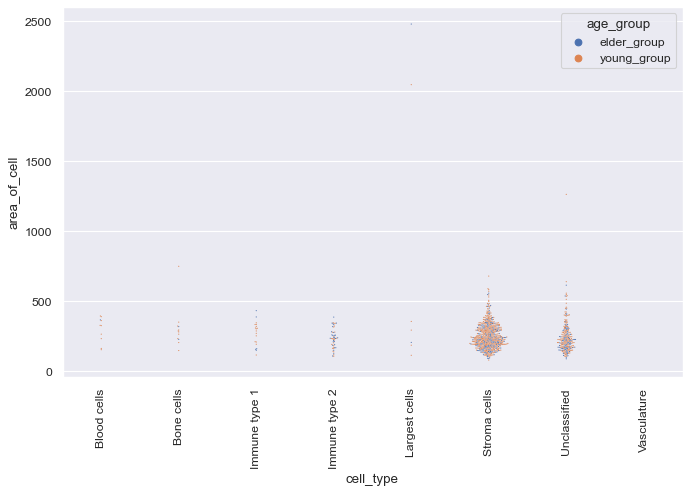

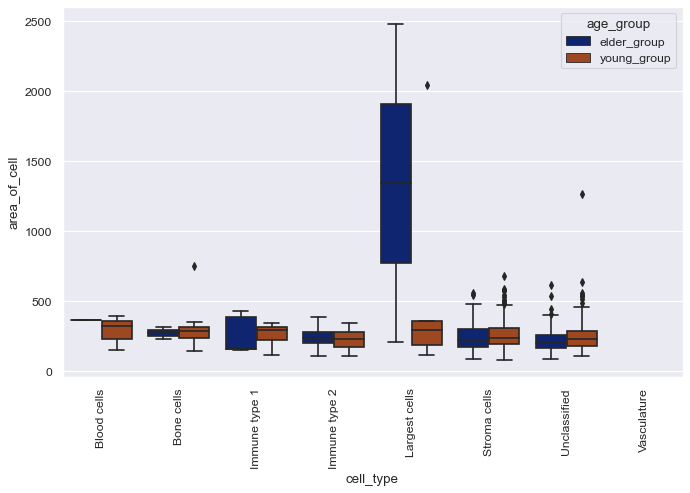

In [201]:
create_swarmplot(df=sample, x_feature='cell_type', y_feature='area_of_cell', feature_hue='age_group')
create_box_plot(df=sample, x_feature='cell_type', y_feature='area_of_cell', feature_hue='age_group')

In [202]:
anova_cell_type(['area_of_cell'])

F-value is [6945.98718068]
P-value is [0.]


A larger F-value indicates a larger difference between the group means.
An F-value of 8012.6 is very large, which suggests that **there is a large difference between the group means**.
The F-value alone does not tell us whether the difference between the group means is statistically significant.

For that we look at p-value.

The p-value is less than 0.05, this indicates that **there is a statistically significant difference between the means of the groups**.
_____

#### Задание 1.2

Есть ли стат-значимость между _**типом клетки**_ и **_экспрессией иммунных маркеров_** (immune_marker_1, immune_marker_2).

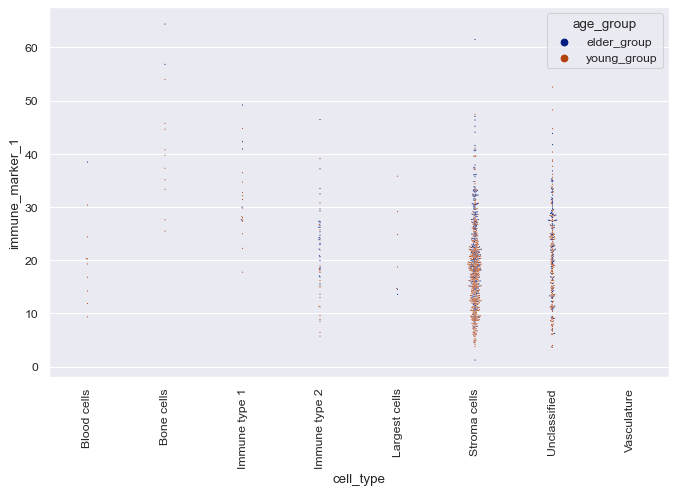

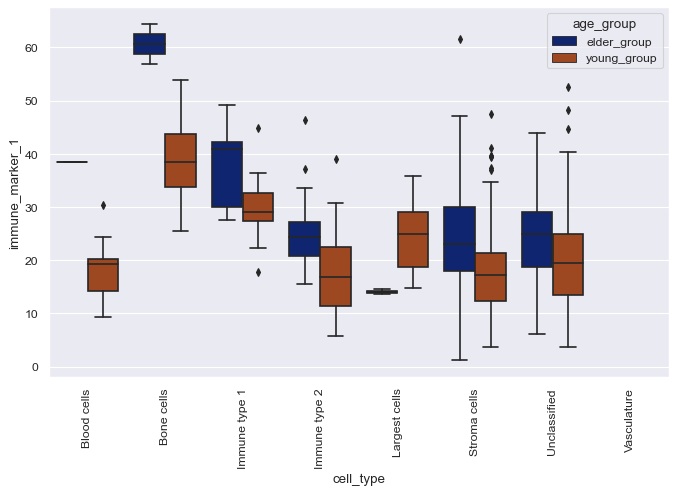

In [203]:
create_swarmplot(df=sample, x_feature='cell_type', y_feature='immune_marker_1', feature_hue='age_group')
create_box_plot(df=sample, x_feature='cell_type', y_feature='immune_marker_1', feature_hue='age_group')

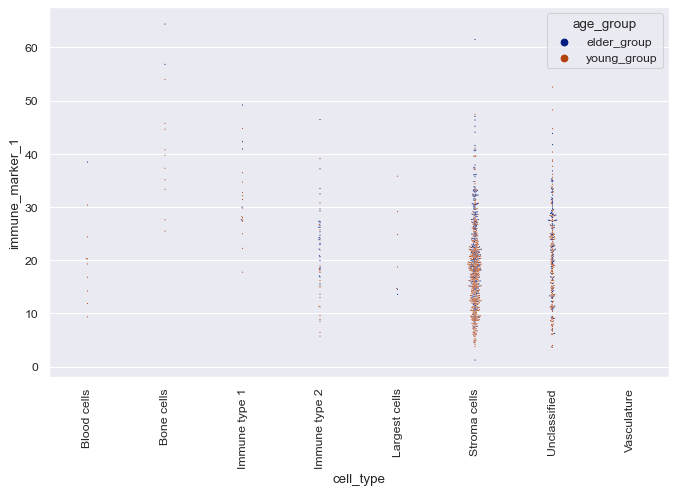

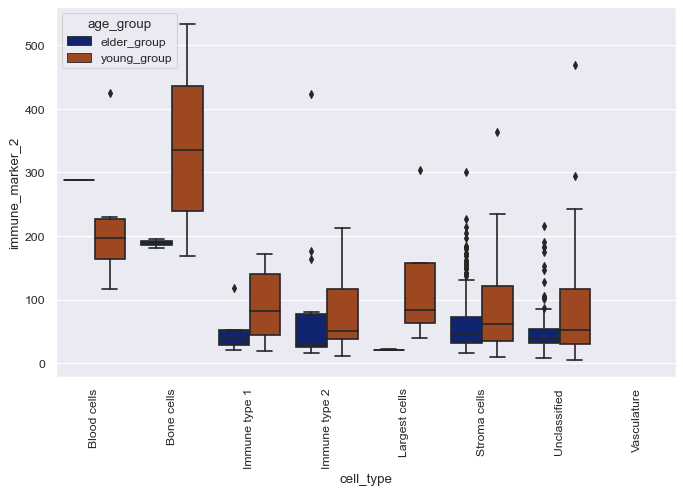

In [204]:
create_swarmplot(df=sample, x_feature='cell_type', y_feature='immune_marker_1', feature_hue='age_group')
create_box_plot(df=sample, x_feature='cell_type', y_feature='immune_marker_2', feature_hue='age_group')

In [205]:
anova_cell_type(['immune_marker_1', 'immune_marker_2'])

F-value is [3617.80662178 3404.86635611]
P-value is [0. 0.]



_______

#### Задание 1.3

Есть ли стат-значимость между _**типом клетки**_ и **дистанцией до ближайших объектов** (distance_to_vasculature, distance_to_largest_cell).

In [206]:
anova_cell_type(['distance_to_vasculature', 'distance_to_largest_cell'])

F-value is [1743.85508859  284.42046323]
P-value is [0. 0.]


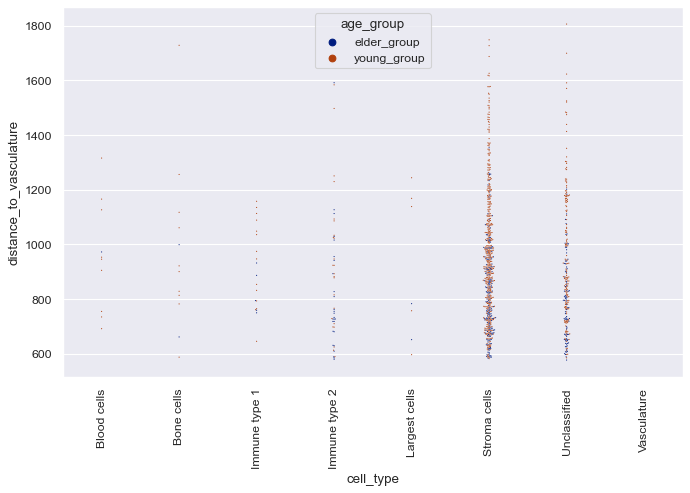

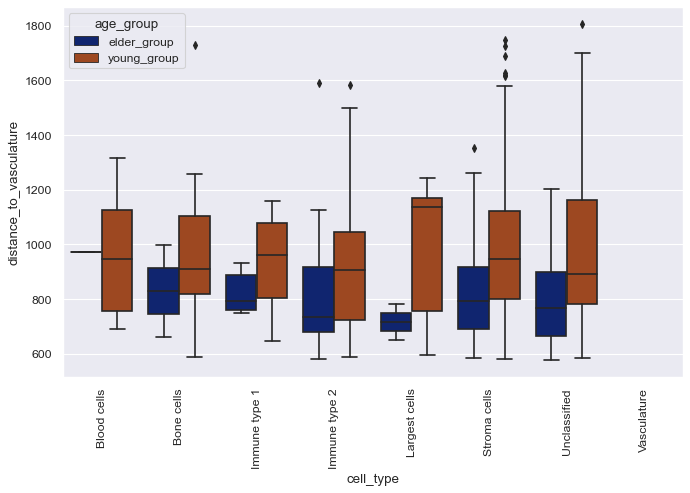

In [207]:
create_swarmplot(df=sample, x_feature='cell_type', y_feature='distance_to_vasculature', feature_hue='age_group')
create_box_plot(df=sample, x_feature='cell_type', y_feature='distance_to_vasculature', feature_hue='age_group')

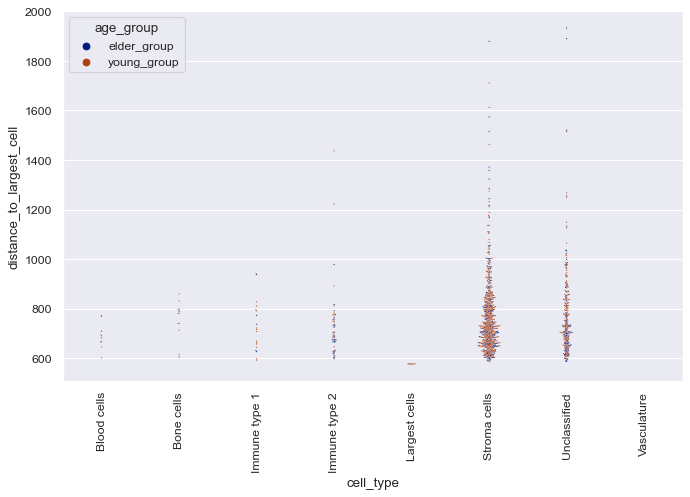

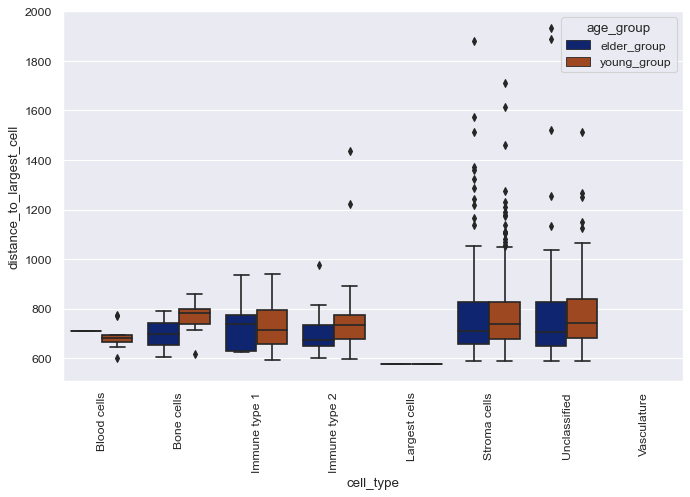

In [208]:
create_swarmplot(df=sample, x_feature='cell_type', y_feature='distance_to_largest_cell', feature_hue='age_group')
create_box_plot(df=sample, x_feature='cell_type', y_feature='distance_to_largest_cell', feature_hue='age_group')

When comparing the distance to large cells by age groups, significant differences are determined for:
- unclassified
- Immune type 2
- stroma cells
- blood cells
- bone cells.
_________
#### Задание 2
 
В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях?

In [209]:
"""
Using the pd.pivot_table() function to create a pivot table from the cell_data DataFrame.
The index of the pivot table is set to be the 'case_id' and 'cell_interaction' columns,
the columns are set to be the 'cell_type' column, and the values are set to be the index column.

The aggfunc parameter is set to len, which means that the pivot table will show
the number of occurrences of each 'cell_type' value for each combination of 'case_id' and 'cell_interaction'.
The resulting pivot table is stored in the 'community_cell' variable.
"""

cell_data.reset_index(inplace=True)
community_cell = pd.pivot_table(cell_data, 
                index= ['case_id','cell_interaction'],columns='cell_type',
                values='index',aggfunc=len).fillna(0).reset_index()

melt_cell_data = pd.melt(community_cell, value_vars=cell_types, var_name='cell_type',
               value_name='cell_number', id_vars='cell_interaction')

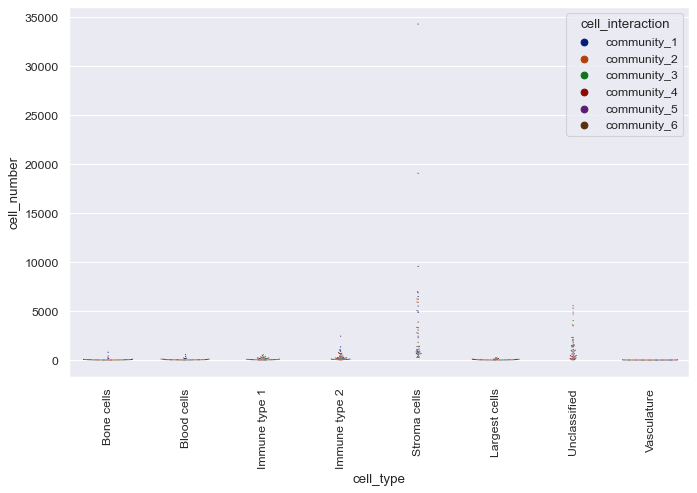

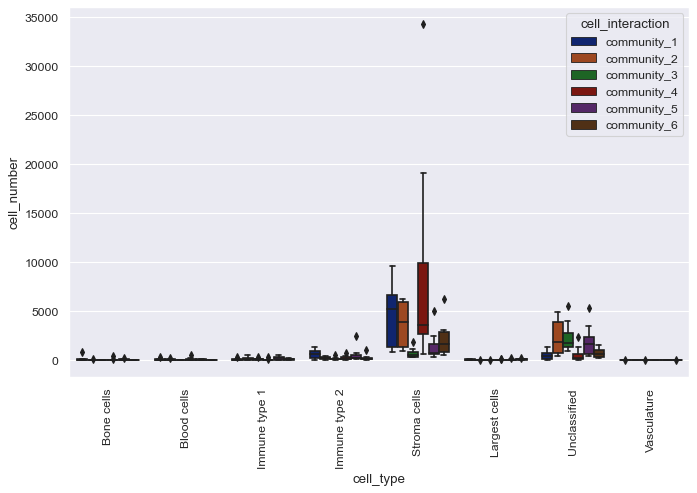

In [210]:
create_swarmplot(df=melt_cell_data, x_feature='cell_type', y_feature='cell_number', feature_hue='cell_interaction')
create_box_plot(df=melt_cell_data, x_feature='cell_type', y_feature='cell_number', feature_hue='cell_interaction')

### The boxplot above clearly shows what is most in the microenvironment of **stromal cells** especially in **__microenvironment number 4__**.
_____

#### Задание 3

Есть ли разница в доле микроокружения в тканях пациентов разных возрастов?

In [211]:
"""
Create a pivot table from the 'cell_data' DataFrame.
The index of the pivot table is set to be the age_group and case_id columns,
the columns are set to be the cell_interaction column, and the values are set to be the index column.

The aggfunc parameter is set to 'len', which means that the pivot table will show
the number of occurrences of each cell_interaction value for each combination of age_group and case_id.
The resulting pivot table is stored in the age_cell_df variable.
"""
age_cell_df = pd.pivot_table(cell_data, 
                index=['age_group', 'case_id'], 
                columns=['cell_interaction'],
                values='index',
                aggfunc=len
                ).fillna(0)

"""
Using the div() method on the age_cell_count pivot table to divide each cell by the sum of its row.
This is done along the rows (axis=1), and the result is stored in 'community_num_df'.
"""
community_num_df = age_cell_df.div(age_cell_df.sum(axis=1), axis=0).reset_index()
community_num_df = pd.melt(community_num_df, value_vars=community_types, var_name='community_type',
                   value_name='community_num', id_vars='age_group')

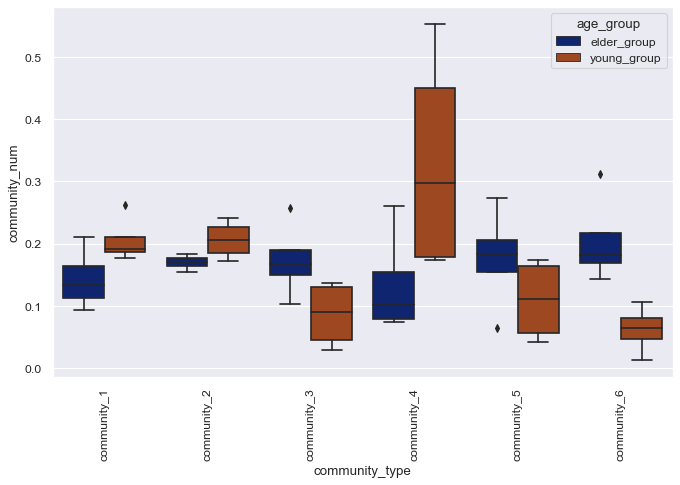

In [212]:
create_box_plot(df=community_num_df, x_feature='community_type', y_feature='community_num', feature_hue='age_group')

Statistically significant differences between the proportions of microenvironments in young and aged patients could not be found.
_____________
#### Задание 4
Правда ли, что иммунные клетки (_Immune type 1 и Immune type 2_) лежат ближе к сосудам и крупным клеткам (Обе колонки distance), чем стромальные клетки (Stroma cells) у молодых, но не у пожилых пациентов?
Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок).

In [213]:
cell_data['distance'] = cell_data['distance_to_largest_cell'] + cell_data['distance_to_vasculature']

mask_for_immune_type = (cell_data['cell_type'] == 'Immune type 1') | (cell_data['cell_type'] == 'Immune type 2')
mask_for_stromma_cells = cell_data['cell_type'] == 'Stroma cells'

filtrated_by_immune_df = cell_data[mask_for_immune_type]
filtrated_by_stromma_df = cell_data[mask_for_stromma_cells]

young_immune_type = filtrated_by_immune_df[filtrated_by_immune_df['age_group'] == 'young_group']
old_immune_type = filtrated_by_immune_df[filtrated_by_immune_df['age_group'] == 'elder_group']
     
young_stromma = filtrated_by_stromma_df[filtrated_by_stromma_df['age_group'] == 'young_group']
old_stromma = filtrated_by_stromma_df[filtrated_by_stromma_df['age_group'] == 'elder_group']

**Null hypothesis (H0)**: The distance of immune cells to vessels and large cells is not different from the distance of stromal cells, and it does not differ between young and elderly patients.

**Alternative hypothesis (H1)**: The distance of immune cells to vessels and large cells is less than the distance for stromal cells, and it differs in young and elderly patients.

In [214]:
def bootstrap_test(data1: pd.DataFrame,
                   data2: pd.DataFrame,
                   num_samples: int,
                   statistic,
                   alpha: float)->float:
    """
    This function will conduct a hypothesis test to determine whether the difference of the means of data1 and data2
    is statistically significant at the alpha level (in this case, 0.05).
    
    The bootstrap_test function uses the resample function from scikit-learn
    to create bootstrapped samples of the data, and then calculates the p-value of the hypothesis test
    using the mean_diff statistic (which is defined as the difference of the means of the two samples).
    """
    sample_size = int(len(data1) / 2)
    bootstrapped_stats = []
    
    for i in range(num_samples):
        # Create a bootstrapped sample of the data by sampling with replacement
        sample1 = resample(data1, replace=True, n_samples=sample_size)
        sample2 = resample(data2, replace=True, n_samples=sample_size)
        stat = statistic(sample1, sample2)
        bootstrapped_stats.append(stat)
    
    observed_stat = statistic(data1, data2)
    p_1 = norm.cdf(x = 0, loc = np.mean(bootstrapped_stats), scale = np.std(bootstrapped_stats))
    p_2 = norm.cdf(x = 0, loc = -np.mean(bootstrapped_stats), scale = np.std(bootstrapped_stats))
    p_value = min(p_1, p_2) * 2
        
    return round(p_value, 5)

# Define the statistic of interest as the difference of the means of the two samples
def mean_diff(data1, data2):
    return np.mean(data1) - np.mean(data2)


num_samples = 10000
alpha = 0.05

If the bootstrapped p-value is low (typically less than 0.05), it suggests that the observed statistic is unlikely to have occurred by chance if the null hypothesis is true. This leads to the conclusion that the null hypothesis is unlikely to be true, and that the alternative hypothesis should be considered instead.

Now we look at ours bootstrapped p-value's.

In [215]:
bootstrap_test(young_immune_type['distance'], young_stromma['distance'], num_samples, mean_diff, alpha)

0.0

In [216]:
bootstrap_test(old_immune_type['distance'], old_stromma['distance'], num_samples, mean_diff, alpha)

0.0

The bootstrapped p-value is less than 0.05, it suggests that the observed statistic is unlikely to have occurred by chance if the null hypothesis is true.
We accept an alternative hypothesis.

**Alternative hypothesis (H1)**: The distance of immune cells to vessels and large cells is less than the distance for stromal cells, and it differs in young and elderly patients.
_______

#### Задание 5

Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов?
Эту гипотезу необходимо проверить пермутационным тестом. 

**Null hypothesis (H0)**: The average distance of immune cells from vessels is the same in young and elderly patients.

**Alternative hypothesis (H1)**: The average distance of immune cells from vessels is closer in young patients than in elderly patients.

In [217]:
def permutation_test(x: pd.Series, y: pd.Series, seed: int = None) -> dict:
    """Perform a permutation test to test the hypothesis that the means of x and y are equal.
    
    Args:
        x (pd.Series): Permutable array.
        y (pd.Series): Base array.
        seed (int, optional): Seed for the random number generator. If provided, the permuted samples will be reproducible.
        
    Returns:
        dict: A dictionary containing the following elements:
            'results': List of permuted samples.
            'observed_diff': Observed difference in means between x and y.
            'p_value': P-value of the test.
    """
    # Set seed for reproducibility
    if seed is not None:
        np.random.seed(seed)
        
    n = len(y)

    results = []

    for i in range(10000):
        results.append(np.mean(np.random.choice(x, n, replace=True)))
    
    observed_diff = np.mean(x) - np.mean(y)
    p_1 = norm.cdf(x = 0, loc = np.mean(results), scale = np.std(results))
    p_2 = norm.cdf(x = 0, loc = -np.mean(results), scale = np.std(results))
    p_value = min(p_1, p_2) * 2    
    return {'results': results, 'observed_diff': observed_diff, 'p_value': p_value}


def plot_permutation_test(results: dict) -> plt.Figure:
    """Plot the results of a permutation test.
    
    Args:
        results (dict): Output of the `permutation_test` function.
        
    Returns:
        plt.Figure: Matplotlib figure object containing the plot.
    """
    sns.set(font_scale=1)
    fig = sns.displot(results['results'], kde=True, rug=True, color='g')
    return fig



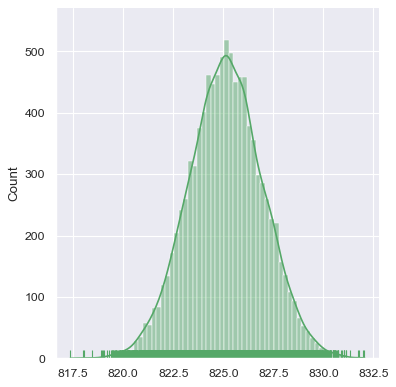

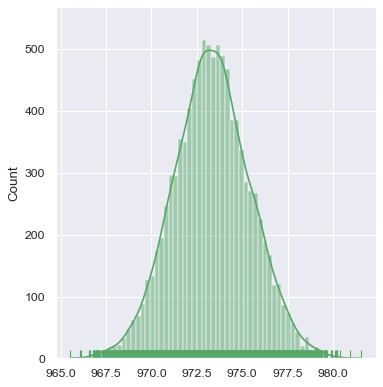

In [218]:
test_young = permutation_test(x=cell_data[cell_data['age_group'] == 'young_group']['distance_to_vasculature'],
                 y=young_immune_type['distance_to_vasculature'])

test_old = permutation_test(x=cell_data[cell_data['age_group'] == 'elder_group']['distance_to_vasculature'],
                 y=old_immune_type['distance_to_vasculature'])


plot_permutation_test(test_old)
plot_permutation_test(test_young)

In [219]:
print(test_old['p_value'], test_young['p_value'])

0.0 0.0


P-value is less than 0.05, it suggests that the observed statistic is unlikely to have occurred by chance if the null hypothesis is true, we can reject the null hypothesis and conclude that the alternative hypothesis is true.

**Alternative hypothesis (H1)**: The average distance of immune cells from vessels is closer in young patients than in elderly patients.
